# Laboratorio 3
## Feed Forward Neural Network (FFNN)
### Roberto Rios 20979
### Javier Mombiela 20067

In [23]:
#importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization

In [24]:
# cagamos el dataset
data = pd.read_csv('sunspots.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [25]:
#imprimimos la data
data

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [26]:
# separamos 'Month' en dos columnas, 'Year' y 'Month'
data[['Year','MonthNum']] = data['Month'].str.split('-',expand=True)

X = data[['Year','MonthNum']]
y = data['Sunspots']

# dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# creamos la red feed forward
feedForward = Sequential([
    Dense(64, input_shape=(2,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

# compilamos la red
feedForward.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [28]:
batched_history1 =  feedForward.fit(
    X_train_scaled, 
    y_train, 
    epochs=75, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/75
53/53 - 2s - loss: 4459.0664 - mse: 4459.0664 - val_loss: 4378.4150 - val_mse: 4378.4150 - 2s/epoch - 42ms/step
Epoch 2/75
53/53 - 0s - loss: 4324.6660 - mse: 4324.6660 - val_loss: 4415.4834 - val_mse: 4415.4834 - 172ms/epoch - 3ms/step
Epoch 3/75
53/53 - 0s - loss: 4163.7026 - mse: 4163.7026 - val_loss: 4545.6323 - val_mse: 4545.6323 - 165ms/epoch - 3ms/step
Epoch 4/75
53/53 - 0s - loss: 3979.8674 - mse: 3979.8674 - val_loss: 4491.9585 - val_mse: 4491.9585 - 174ms/epoch - 3ms/step
Epoch 5/75
53/53 - 0s - loss: 3810.7336 - mse: 3810.7336 - val_loss: 4086.0327 - val_mse: 4086.0327 - 200ms/epoch - 4ms/step
Epoch 6/75
53/53 - 0s - loss: 3556.2791 - mse: 3556.2791 - val_loss: 3890.8054 - val_mse: 3890.8054 - 149ms/epoch - 3ms/step
Epoch 7/75
53/53 - 0s - loss: 3292.6401 - mse: 3292.6401 - val_loss: 3688.4434 - val_mse: 3688.4434 - 163ms/epoch - 3ms/step
Epoch 8/75
53/53 - 0s - loss: 3003.1992 - mse: 3003.1992 - val_loss: 2991.8804 - val_mse: 2991.8804 - 187ms/epoch - 4ms/step
Ep

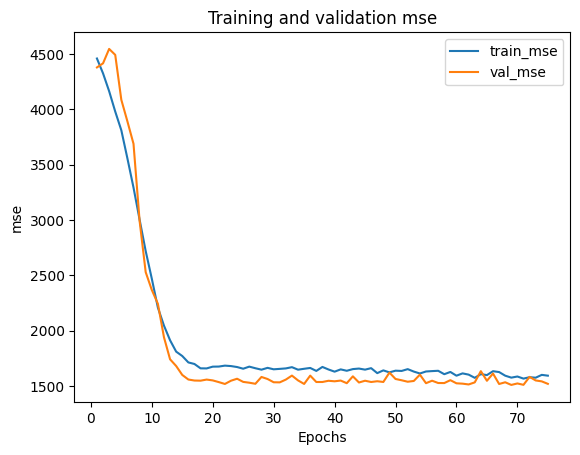

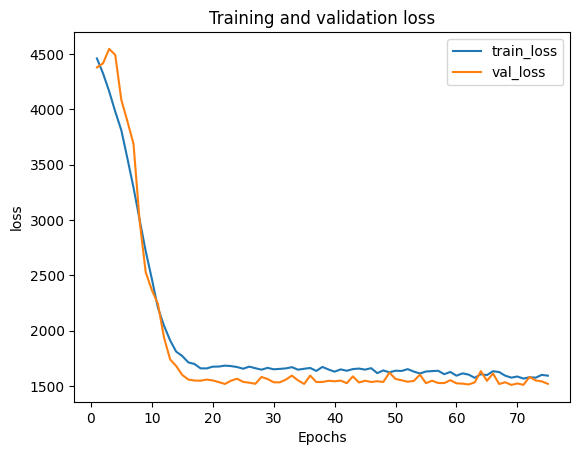

18/18 - 0s - loss: 1531.3101 - mse: 1531.3101 - 41ms/epoch - 2ms/step


[1531.31005859375, 1531.31005859375]

In [29]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history1, 'mse')
plot_metric(batched_history1, 'loss')

feedForward.evaluate(X_test_scaled, y_test, verbose=2)


In [33]:
y_hat = feedForward.predict(X_train_scaled)
y_hat

71/71 [==============================] - 0s 1ms/step


array([[76.41319 ],
       [60.56997 ],
       [53.644974],
       ...,
       [52.575787],
       [69.91428 ],
       [35.97678 ]], dtype=float32)

In [34]:
y_train

2408    145.3
280      38.0
1350     78.0
2213      5.2
2474      4.9
        ...  
1604     57.7
779      14.3
1290      4.6
527      56.0
1871     54.6
Name: Sunspots, Length: 2256, dtype: float64